In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets

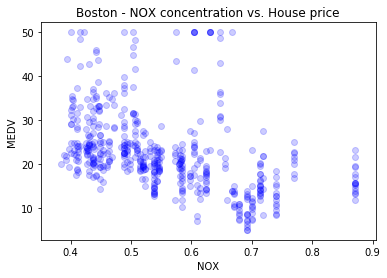

In [11]:
boston = sklearn.datasets.load_boston()
plt.scatter(boston.data[:, 4], boston.target, marker='o', c='b', alpha=0.2)
plt.xlabel(boston.feature_names[4])
plt.ylabel('MEDV')
plt.title('Boston - NOX concentration vs. House price')
plt.show()